In [197]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn import tree

# Data preprocessing

In [198]:
data = pd.read_csv("mushrooms.csv")
print(f'Data shape: {data.shape}')
data.head()

Data shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [199]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Data binarizing

In [200]:
classes = sorted(data['class'].unique())
for i in data.columns:
    v = sorted(data[i].unique())[0]
    data[i] = pd.Series(np.where(data[i].values == v, 1, 0),
              data.index).values

In [201]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


## Heatmap of features

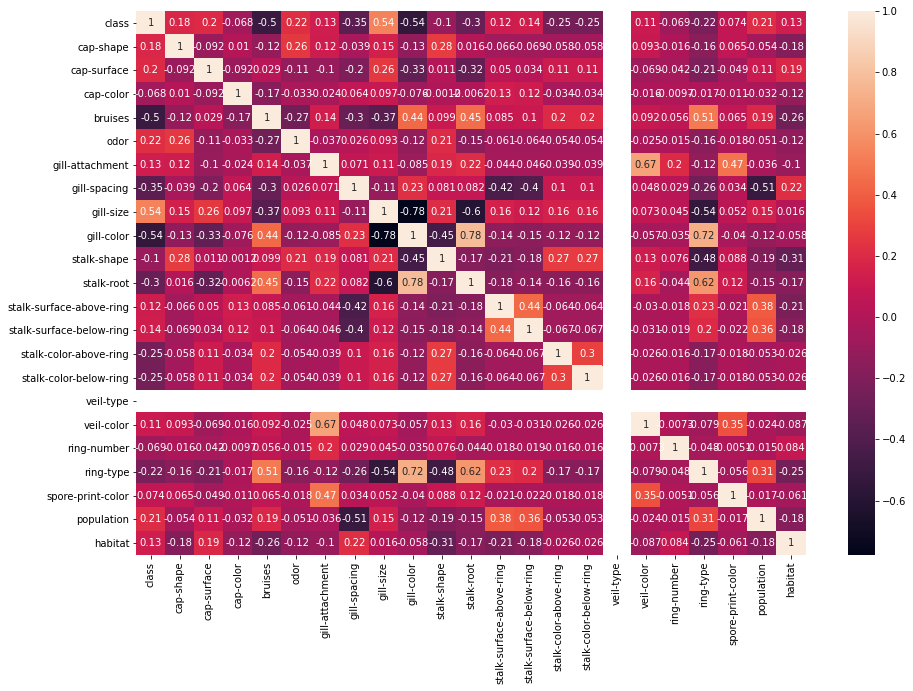

In [202]:
plt.figure(figsize=(15, 10))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()

Not a lot of highly correlated features (>0.6), only ```gill-color```, for instance, may be excluded.

# Basic ml classification models
## Logistic regression

In [219]:
# Train/test splitting
X, y = data.iloc[: , 1:], data.iloc[: , 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [220]:
log_reg_model = LogisticRegression().fit(X_train, y_train)
print("train accuracy:",log_reg_model.score(X_train,y_train))
print("test accuracy:",log_reg_model.score(X_test,y_test))

train accuracy: 0.9482940555750967
test accuracy: 0.9515996718621821


In [221]:
#predictions report
log_reg_preds = log_reg_model.predict(X_test)
print(classification_report(y_test,log_reg_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1165
           1       0.95      0.96      0.95      1273

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [222]:
print("Precision = {}".format(precision_score(y_test, log_reg_preds)))
print("Recall = {}".format(recall_score(y_test, log_reg_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, log_reg_preds)))
print("F1 Score = {}".format(f1_score(y_test, log_reg_preds)))

Precision = 0.9452582883577486
Recall = 0.9630793401413983
Accuracy = 0.9515996718621821
F1 Score = 0.9540856031128404


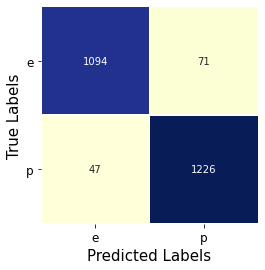

In [223]:
cm = confusion_matrix(y_test, log_reg_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Naive Bayes

In [224]:
nb_model = GaussianNB().fit(X_train,y_train)
print("train accuracy:",nb_model.score(X_train,y_train))
print("test accuracy:",nb_model.score(X_test,y_test))

train accuracy: 0.898698557861414
test accuracy: 0.9015586546349467


In [225]:
#predictions report
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1165
           1       0.90      0.92      0.91      1273

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438



In [226]:
print("Precision = {}".format(precision_score(y_test, nb_model_preds)))
print("Recall = {}".format(recall_score(y_test, nb_model_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, nb_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, nb_model_preds)))

Precision = 0.8957854406130268
Recall = 0.9183032207384132
Accuracy = 0.9015586546349467
F1 Score = 0.9069045771916213


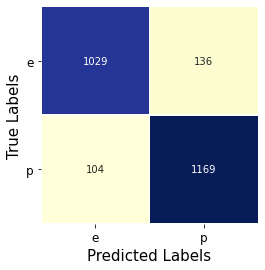

In [227]:
cm = confusion_matrix(y_test, nb_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Random Forest

In [228]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
print("train accuracy:",rf_model.score(X_train,y_train))
print("test accuracy:",rf_model.score(X_test,y_test))

train accuracy: 0.9917340837143862
test accuracy: 0.9922067268252666


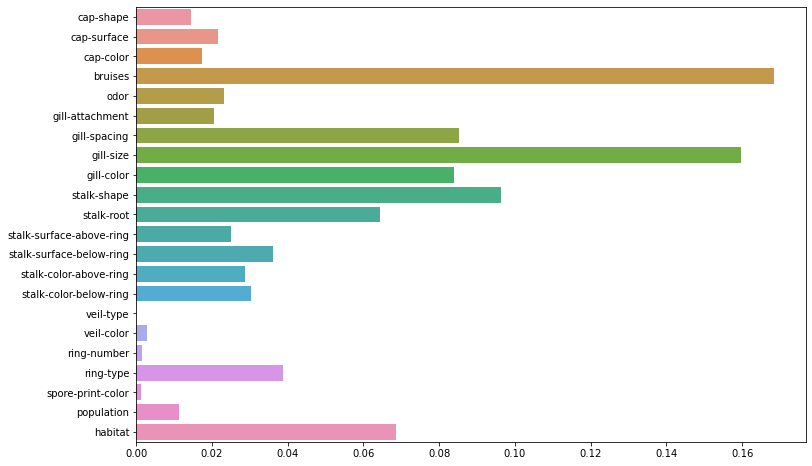

In [229]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.show()

As it can be seen, 5 most important features w.r.t. random forest classifier are 'bruises', 'gill-size', 'stalk-shape', 'gill-spacing', 'gill-color'.

In [230]:
#predictions
rf_model_preds = rf_model.predict(X_test)
print(classification_report(y_test,rf_model_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1165
           1       0.99      0.99      0.99      1273

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [231]:
# Metrics
print("Precision = {}".format(precision_score(y_test, rf_model_preds)))
print("Recall = {}".format(recall_score(y_test, rf_model_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, rf_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, rf_model_preds)))

Precision = 0.9906103286384976
Recall = 0.9945011783189317
Accuracy = 0.9922067268252666
F1 Score = 0.9925519404155234


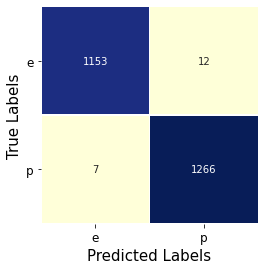

In [232]:
cm = confusion_matrix(y_test, rf_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Decision Tree Classifier

In [233]:
dec_tree = DecisionTreeClassifier().fit(X_train,y_train)
print("train accuracy:",dec_tree.score(X_train,y_train))
print("test accuracy:",dec_tree.score(X_test,y_test))

train accuracy: 0.9917340837143862
test accuracy: 0.9922067268252666


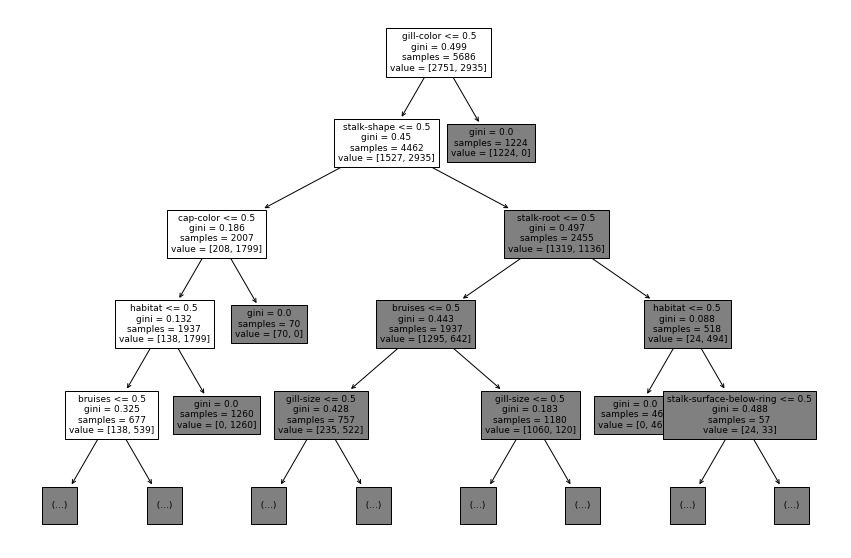

In [234]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dec_tree,fontsize = 9, feature_names = data.columns[1:], max_depth = 4)
fig = plt.gcf()
fig.savefig('tree.png')

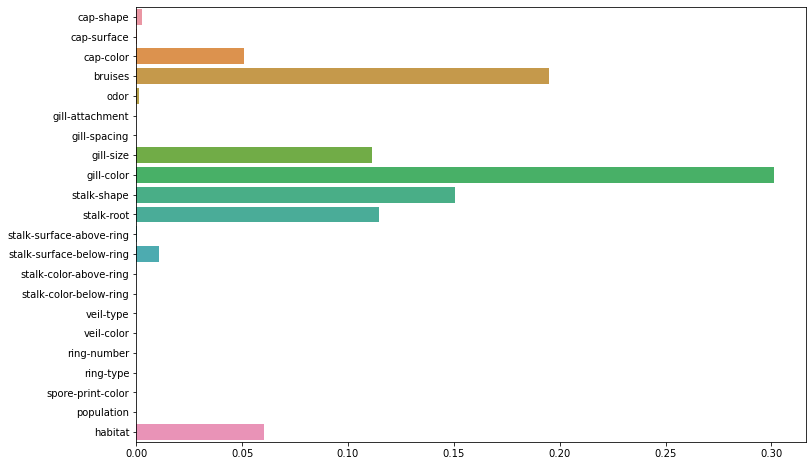

In [235]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=dec_tree.feature_importances_, y=X.columns)
plt.show()

In [236]:
#predictions
dec_tree_preds = dec_tree.predict(X_test)
print(classification_report(y_test,dec_tree_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1165
           1       0.99      0.99      0.99      1273

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [237]:
# Metrics
print("Precision = {}".format(precision_score(y_test, dec_tree_preds)))
print("Recall = {}".format(recall_score(y_test, dec_tree_preds)))
print("Accuracy = {}".format(accuracy_score(y_test, dec_tree_preds)))
print("F1 Score = {}".format(f1_score(y_test, dec_tree_preds)))

Precision = 0.9906103286384976
Recall = 0.9945011783189317
Accuracy = 0.9922067268252666
F1 Score = 0.9925519404155234


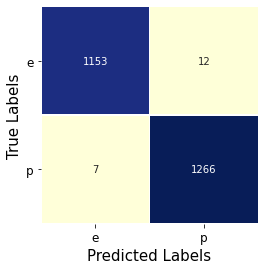

In [238]:
cm = confusion_matrix(y_test, dec_tree_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## dl model

In [245]:
dl_model = Sequential()
dl_model.add(Dense(20, activation='relu', input_shape=X_train.shape))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

In [246]:
dl_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5686, 20)          460       
_________________________________________________________________
dense_17 (Dense)             (None, 5686, 50)          1050      
_________________________________________________________________
dense_18 (Dense)             (None, 5686, 50)          2550      
_________________________________________________________________
dense_19 (Dense)             (None, 5686, 1)           51        
Total params: 4,111
Trainable params: 4,111
Non-trainable params: 0
_________________________________________________________________


In [247]:
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [248]:
dl_model_history=dl_model.fit(X_train,y_train, epochs=20, batch_size= 100, validation_data=(X_test,y_test))

Epoch 1/20
57/57 [==============================] - 1s 4ms/step - loss: 0.5898 - accuracy: 0.7624 - val_loss: 0.2563 - val_accuracy: 0.9159
Epoch 2/20
57/57 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9393 - val_loss: 0.1046 - val_accuracy: 0.9676
Epoch 3/20
57/57 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9683 - val_loss: 0.0693 - val_accuracy: 0.9815
Epoch 4/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9765 - val_loss: 0.0523 - val_accuracy: 0.9910
Epoch 5/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9926 - val_loss: 0.0410 - val_accuracy: 0.9914
Epoch 6/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9918 - val_loss: 0.0351 - val_accuracy: 0.9914
Epoch 7/20
57/57 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9910 - val_loss: 0.0347 - val_accuracy: 0.9914
Epoch 8/20
57/57 [==

Text(0, 0.5, 'Accuracy')

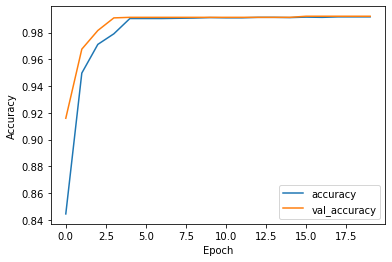

In [249]:
plt.plot(dl_model_history.history['accuracy'])
plt.plot(dl_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

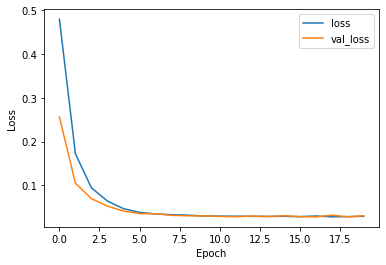

In [250]:
plt.plot(dl_model_history.history['loss'])
plt.plot(dl_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [251]:
#predictions
dl_model_preds = dl_model.predict(X_test)
print(classification_report(y_test,dl_model_preds.round()))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1165
           1       0.99      1.00      0.99      1273

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [252]:
# Metrics
print("Precision = {}".format(precision_score(y_test, dl_model_preds.round())))
print("Recall = {}".format(recall_score(y_test, dl_model_preds.round())))
print("Accuracy = {}".format(accuracy_score(y_test, dl_model_preds.round())))
print("F1 Score = {}".format(f1_score(y_test, dl_model_preds.round())))

Precision = 0.9890795631825273
Recall = 0.9960722702278083
Accuracy = 0.9922067268252666
F1 Score = 0.9925636007827789


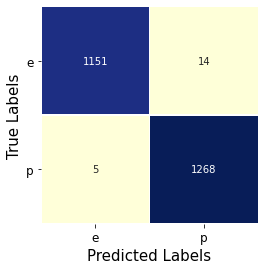

In [253]:
cm = confusion_matrix(y_test, dl_model_preds.round())
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', linewidths=.5, cmap="YlGnBu")
ax.xaxis.set_ticklabels(classes, fontsize = 12)
ax.yaxis.set_ticklabels(classes, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()